<h1 style='text-align:center'> Exploring and Modelling Environmental Threats to The Atmosphere</h1>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [128]:
air_data_path = '../data/AirData.csv'
df = pd.read_csv(air_data_path)

,Year,Population Density,Nitrous oxide emissions(kt),CO2 emissions (kt),Methane emissions (kt)
54,2015,57.630832,326789.3848,36138285.0,8094956.0
55,2016,58.296128,328389.4353,36138285.0,8108976.0
56,2017,58.961853,334567.3285,38138285.0,8673426.0
57,2018,59.617881,339234.3295,39138285.0,8599732.0
58,2019,59.917881,392342.2934,40138285.0,8973890.0


In [138]:
df.tail()

,Year,Population Density,Nitrous oxide emissions(kt),CO2 emissions (kt),Methane emissions (kt)
54,2015,57.630832,326789.3848,36138285.0,8094956.0
55,2016,58.296128,328389.4353,36138285.0,8108976.0
56,2017,58.961853,334567.3285,38138285.0,8673426.0
57,2018,59.617881,339234.3295,39138285.0,8599732.0
58,2019,59.917881,392342.2934,40138285.0,8973890.0


In [139]:
df.head()

,Year,Population Density,Nitrous oxide emissions(kt),CO2 emissions (kt),Methane emissions (kt)
0,1961,24.129479,154587.32,9.396706e+06,4013495.0
1,1962,24.545523,134587.32,9.434403e+06,4089082.0
2,1963,25.056836,144587.32,9.818840e+06,4568691.0
3,1964,25.571241,148587.32,1.035575e+07,4783024.0
4,1965,26.096704,143587.32,1.094701e+07,4797465.0


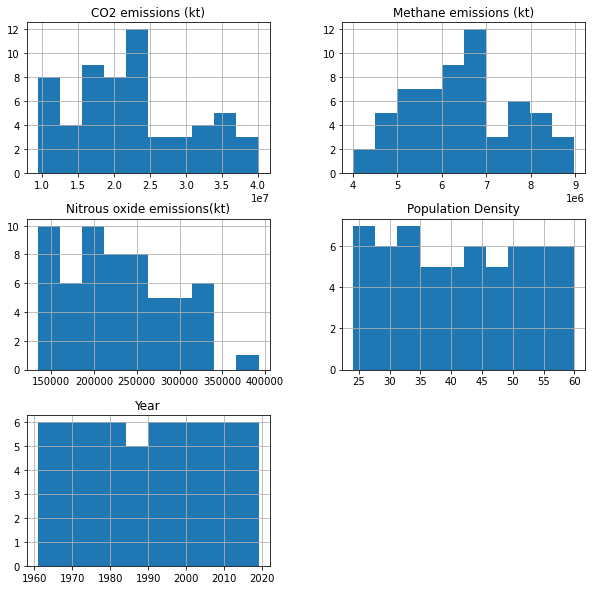

In [108]:
fig = df.hist(figsize=(10,10))

# Reuse of x-axis
years = np.array(df['Year'])
ryears = years.reshape(-1,1) # Regression model needs a 2D column vector
hundred_years = np.arange(2020,2121).reshape(-1,1)

array([0.63361594])

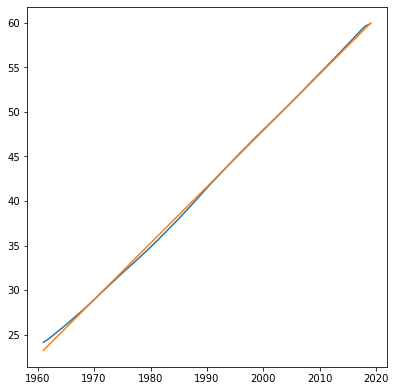

In [109]:
# Plotting population density
population = np.array(df['Population Density'])
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years,population)

# Training model
reg = linear_model.LinearRegression()
reg.fit(ryears, population)
ax.plot(years, reg.predict(ryears))
reg.coef_

array([471483.92858837])

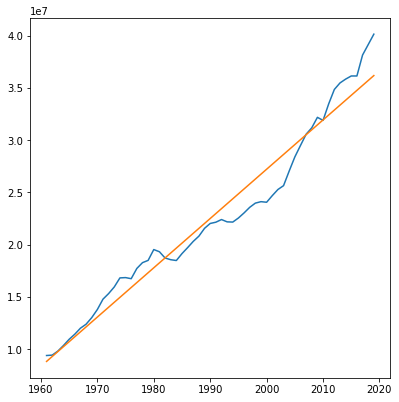

In [113]:
# Plotting CO2 emissions
CO2_emissions = np.array(df['CO2 emissions (kt)'])
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years,CO2_emissions)

# Training and fitting
reg = linear_model.LinearRegression()
reg.fit(ryears, CO2_emissions)
ax.plot(years, reg.predict(ryears))
reg.coef_

array([66667.20496254])

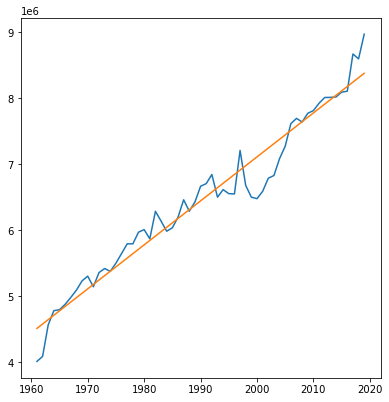

In [68]:
# Methane emissions 
methane = np.array(df['Methane emissions (kt)'])
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years,methane)

# Training and fitting
reg = linear_model.LinearRegression()
reg.fit(ryears, methane)
ax.plot(years, reg.predict(years))
reg.coef_

[3601.99938691]
-6940476.883584455


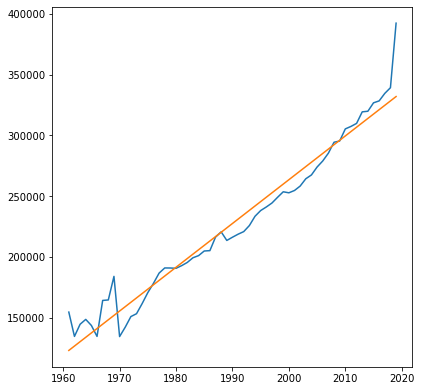

In [140]:
# Methane emissions 
nox = np.array(df['Nitrous oxide emissions(kt)'])
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years,nox)

# Training and fitting
reg = linear_model.LinearRegression()
reg.fit(ryears, nox)
plot = ax.plot(ryears, reg.predict(ryears))
print(reg.coef_)
print(reg.intercept_)
minimum = nox[-1]